In [1]:
from math import *
from skimage import data, exposure, img_as_ubyte
from skimage.color import convert_colorspace, rgb2gray
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def my_gamma(im, gamma=1.0):
    if gamma < 0 :
        print("Gamma nie może być ujemne!")
    else:
        inputimg = im
        if len(inputimg.shape) > 2 :     # jeżeli funkcja dostanie kolorowy obrazek:
            channels = inputimg.shape[2] # pobieram ilość kanałów "w obrazku"
        else:                       # w przeciwnym przypadku
            channels = 1            # zakładam, że obrazek jest w skali szarości (posiada tylko jeden kanał)

        inputimg = img_as_ubyte(inputimg)     # za pomocą wbudowanej w scikit funkcji zamieniam wartości luminancji na liczby całkowite 0-255
        
        for x in range(inputimg.shape[0]):      
            for y in range(inputimg.shape[1]):               # dla każdego punktu na obrazie
                for z in range(channels):               # ... oraz każdego kanału (jeżeli więcej niż jeden)
                    if(channels > 1):                  
                        inputimg[x][y][z] = floor(255 * pow(inputimg[x][y][z]/255, gamma))
                    else:                              
                        inputimg[x][y] = floor(255 * pow(inputimg[x][y]/255, gamma))
    return inputimg

In [3]:
def my_bin(im, thr_start=50, thr_end=150, inverse=False):
    if len(im.shape) > 2:
        im = rgb2gray(im)
    im = img_as_ubyte(im)
    
    if inverse == True:
        foreground = 255
        background = 0
    else:
        foreground = 0
        background = 255
    
    for x in range(im.shape[0]):
        for y in range(im.shape[1]):
            if im[x][y] > thr_start and im[x][y] <= thr_end:
                im[x][y] = foreground
            else:
                im[x][y] = background
    return im

In [4]:
def show2imgs(im1, im2, title1='Obraz pierwszy', title2='Obraz drugi', size=(10,10)):
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(im1, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(im2, cmap='gray')
    ax2.axis('off')
    ax2.set_title(title2)
    plt.show()

def showimg(im, title="Obraz"):
    plt.figure(figsize=(5,5))
    plt.imshow(im, cmap="gray")
    plt.axis('off')
    plt.title(title)
    plt.show()

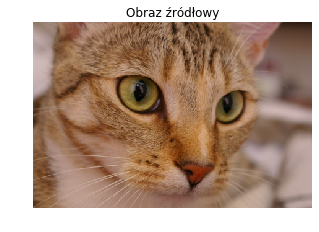

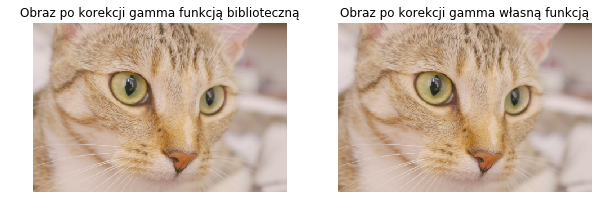

C:\Users\Machina\Anaconda3\envs\py36\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


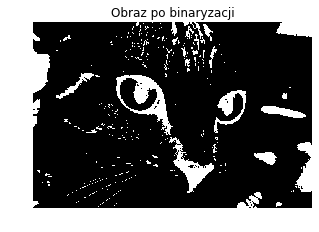

In [5]:
img = data.chelsea()
gamma_const = 0.5
showimg(img, "Obraz źródłowy")
img_after_libgamma = exposure.adjust_gamma(img, gamma=gamma_const)
img_after_gamma = my_gamma(img, gamma_const)
show2imgs(img_after_libgamma, im2=img_after_gamma, title1="Obraz po korekcji gamma funkcją biblioteczną", title2="Obraz po korekcji gamma własną funkcją")

img = data.chelsea()
img_after_bin = my_bin(img, 70, 170, False)
showimg(img_after_bin, "Obraz po binaryzacji")